# Case Study on Correlation and Regression


### Introduction

A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.
Here we use Linear regression, one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis.

### Scenario

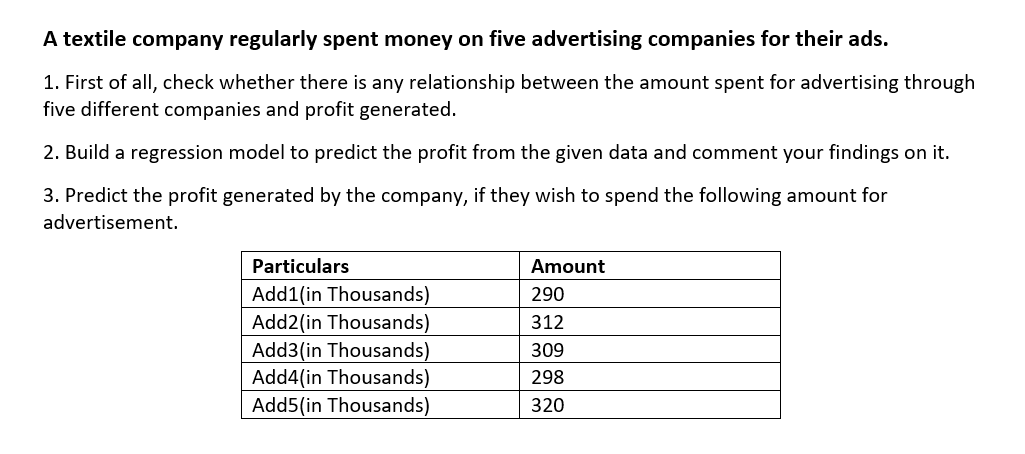

### Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
from sklearn import linear_model

### Importing the dataset


In [3]:
data = pd.read_csv('Add_sales_data_2018.csv')

### Analyzing the data

In [4]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


### Drop Date Column

Date column is irrelevant in this analysis, so the date column removed by using drop function.

In [5]:
data1 = data.drop(columns =['Date'])
data1.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,208.00,222.25,206.85,216.00,215.15,4093.065
1,217.00,218.60,205.90,210.25,209.20,4042.448
2,223.50,227.80,216.15,217.25,218.20,4213.819
3,230.00,237.50,225.75,226.45,227.60,4391.665
4,234.55,234.60,221.05,230.30,230.90,4350.683


### Numerical/Statistical analysis of the dataset

In [6]:
data1.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


### Dimensions of dataset


In [7]:
print('There are ',data1.shape[0],'rows and ',data1.shape[1],'columns in the dataset.')


There are  205 rows and  6 columns in the dataset.


### Check if there are repeated values in the dataset or not.


In [8]:
print('There are',data1.duplicated().sum(),'duplicate values in the dateset.') 


There are 0 duplicate values in the dateset.


### Check for NULL values


In [9]:
data1.isnull().sum()


Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

Inference: There are no null values in the dataset.

### 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

From the corr function, we can find the correlation between the columns.

In [10]:
c = data1.corr()
c

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


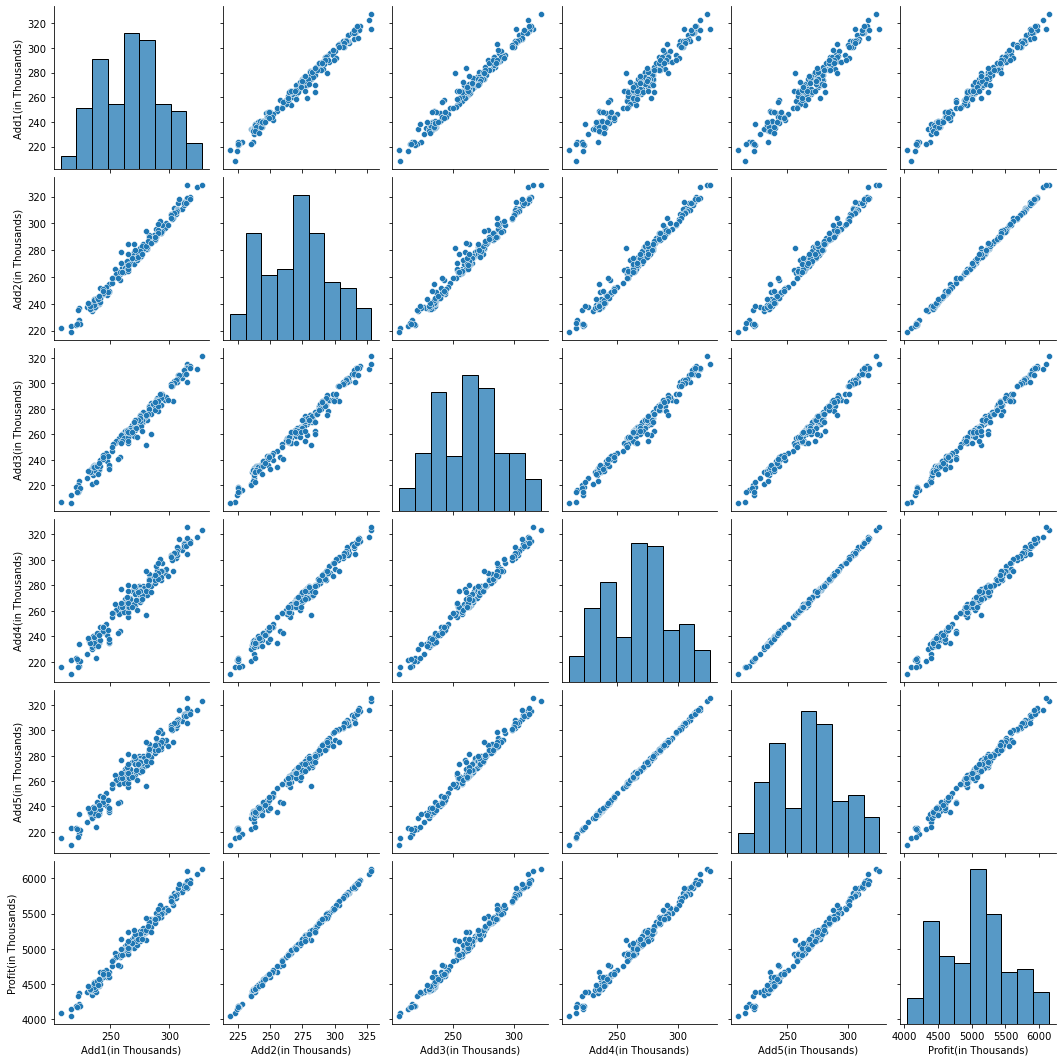

In [11]:
sns.pairplot(data1)

<AxesSubplot:>

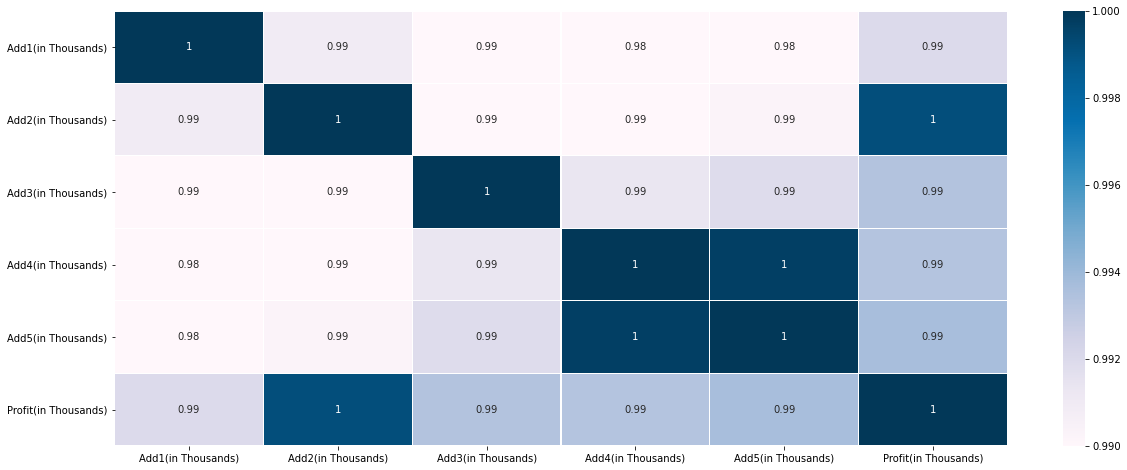

In [12]:
corrmatrix = data1.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=.99,vmax=1, annot=True, linewidth=0.2, cmap='PuBu')

Inference: The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation. From the above figures, we can see that all five columns have a direct relationship with the profit, which is our target variable.It indicates highly positive correlation.

### 2. Build a regression model to predict the profit from the given data and comment your findings on it.


In [13]:
x = data1[["Add1(in Thousands)", 'Add2(in Thousands)',"Add3(in Thousands)", "Add4(in Thousands)",'Add5(in Thousands)']]
y = data1["Profit(in Thousands)"]

regr= linear_model.LinearRegression()
regr.fit(x, y)


LinearRegression()

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size = .20)

In [15]:
print(x_train)

     Add1(in Thousands)  Add2(in Thousands)  Add3(in Thousands)  \
4                234.55              234.60              221.05   
71               257.90              263.55              256.45   
134              264.65              264.65              257.60   
145              272.00              274.45              265.15   
122              276.10              276.35              271.50   
..                  ...                 ...                 ...   
67               263.00              268.25              261.45   
192              305.50              308.80              302.50   
117              282.30              287.45              279.25   
47               235.90              242.95              234.50   
172              306.00              310.70              302.80   

     Add4(in Thousands)  Add5(in Thousands)  
4                230.30              230.90  
71               261.95              262.10  
134              259.10              258.85  
145        

In [16]:
print(x_test)

     Add1(in Thousands)  Add2(in Thousands)  Add3(in Thousands)  \
52               239.70              243.30              228.60   
181              314.00              316.70              311.80   
5                234.05              235.95              230.20   
18               221.00              224.50              219.10   
188              314.30              314.95              307.55   
170              305.25              306.80              300.70   
76               279.15              281.00              271.45   
154              265.00              268.85              262.20   
104              296.00              296.20              287.25   
33               236.05              242.00              235.95   
12               237.90              239.25              233.50   
129              259.35              278.40              259.35   
55               257.90              257.90              242.10   
66               262.70              270.15              262.7

In [17]:
print(y_train)

4      4350.683
71     4916.064
134    4934.682
145    5108.626
122    5167.878
         ...   
67     5001.615
192    5767.839
117    5359.346
47     4519.061
172    5789.791
Name: Profit(in Thousands), Length: 164, dtype: float64


In [18]:
print(y_test)

52     4494.144
181    5921.116
5      4404.686
18     4190.965
188    5880.541
170    5728.804
76     5225.140
154    5017.503
104    5518.561
33     4513.600
12     4464.110
129    5140.372
55     4760.877
66     5038.222
45     4606.340
169    5730.999
130    4922.845
7      4470.775
37     4480.363
152    5065.652
80     5043.705
111    5491.792
131    4968.030
171    5792.175
179    6137.800
138    5247.011
156    5137.534
113    5373.275
161    5212.949
89     4898.776
183    5972.337
193    5745.806
125    5153.977
173    5805.521
92     4763.690
16     4175.677
189    5938.474
136    4915.682
22     4523.704
74     5113.337
44     4648.627
Name: Profit(in Thousands), dtype: float64


In [19]:
model = regr.fit(x_train,y_train)

In [20]:
predictions = model.predict(x_test)

In [21]:
from sklearn.metrics import mean_squared_error
print("MSE is : \n " ,mean_squared_error(y_test, predictions ))

MSE is : 
  1.8157623202383536e-24


Inference:
The mean squared error (MSE) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.Here the MSE is 1.815, which means lower the MSE, the closer is forecast to actual.

### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

 Add1(in Thousands) 290

 Add2(in Thousands) 312 

 Add3(in Thousands) 309

 Add4(in Thousands) 298 

Add5(in Thousands) 320

In [29]:
predictedprofit = regr.predict([[290, 312,309,298,320]])

x = print("The Predicted Profit is", (round(predictedprofit.item())))

The Predicted Profit is 5820


### Conclusion
So this is how we can predict the profit of a company by using machine learning algorithms. Such tasks can help a company to set a target that can be achieved. Here, the mean absolute error is 1.815. Therefore our predicted value can be 1.815 units more or less than the actual value.